In [ ]:
# data = '/content/drive/MyDrive/yrs/final_asan1.csv'
# data = 'final_asan1.csv'
data = '/content/final_asan1.csv'

In [ ]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
benefits = []
asan = []

In [ ]:
import csv

with open(data,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    benefits.append(row[3])
    asan.append(row[1])

In [ ]:
print(len(benefits))

238


In [ ]:
input_1=[]
output=[]
data = []

In [ ]:
for i in range (len(benefits)):
  line = benefits[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  input_1.append(line)
  data.append(line)
  line = asan[i]
  line = re.sub(r'[^A-Za-z0-9 ]+', ' ', line)
  line = line.replace(" ","")
  line = line.replace("(","")
  line = line.replace(")","")
  line = line.replace(".","")
  line = line.replace("/","")
  output.append(line)

In [ ]:
data

['awareness',
 'awareness physical breath counting mental easy mind wander nadi shodhana simply aware wandering tendency mind continuing practice count automatically encourage awareness return practice spiritual ajna chakra awareness tongue sound cooling sensa tion inhaled breath',
 'awareness physical relaxing body breath spiritual ajna manipura chakra',
 'awareness physical abdominal movement spiritual manipura chakra awareness physical synchronizing breath rhyth mically abdominal movement spiritual manipura chakra practice',
 'awareness tensing arms imaginary target breath synchronized movement',
 'awareness ajna chakra',
 'awareness physical early stages practice aware ness physical sensation breathing process sufficient relaxation achieved awareness transferred eyebrow centre spiritual ajna chakra',
 'awareness physical smooth controlled movement balance spiritual vishuddhi chakra chandra mantras position awareness physical smooth controlled movement deep stretch feet finger tips 

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
import keras.backend as K
import numpy as np

oov_token = "<OOV>"
embed_size = 20

In [ ]:
tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(input_1)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(input_1)

print(len(word_index))

365


In [ ]:
vocab_size = len(word_index)

In [ ]:
index_to_word_map = {}
word_to_index_map = {}
for word,index in word_index.items():
  index_to_word_map[index] = word
  word_to_index_map[word]=index

In [ ]:
tokenizer2 = Tokenizer(oov_token=oov_token)
tokenizer2.fit_on_texts(output)
word_index2 = tokenizer2.word_index
sequence2 = tokenizer2.texts_to_sequences(output)

print(len(word_index2))

239


In [ ]:
vocab_size2 = len(word_index2)

In [ ]:
index_to_word_map2 = {}
for word,index in word_index2.items():
  index_to_word_map2[index] = word

In [ ]:
benefits = []
asan = []

In [ ]:
for i in range (1,len(sequence)):
  benefits.append(sequence[i])
for i in range (1,len(sequence2)):
  asan.append(sequence2[i])

In [ ]:
asan = np.asarray(asan)
np.shape(asan)

(237, 1)

In [ ]:
y = asan - 3
y = tf.keras.utils.to_categorical(y,237)

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
benefits = pad_sequences(benefits,50,padding='post',truncating='pre')

In [ ]:
benefits = np.array(benefits)
np.shape(benefits)

(237, 50)

In [ ]:
fields = ['Index','Word']
row = []
rows= []
for i in range(1,365):
  row.append(i)
  row.append(index_to_word_map[i])
  rows.append(row)
  row=[]

In [ ]:
with open('/content/map.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda, Flatten, Reshape
import tensorflow as tf

model = Sequential()
model.add(Embedding(vocab_size+1,embed_size,input_length=50))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size2-2, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            7320      
                                                                 
 lambda (Lambda)             (None, 20)                0         
                                                                 
 dense (Dense)               (None, 237)               4977      
                                                                 
Total params: 12,297
Trainable params: 12,297
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import KFold
# Define the K-fold Cross Validator
kfold = KFold(n_splits=20, shuffle=True)
acc_per_fold = []
loss_per_fold = []
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(benefits, y):
  history = model.fit(benefits[train], y[train],
              batch_size=32,
              epochs=1000,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(benefits[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

Score for fold 1: loss of 2.3828790187835693; accuracy of 75.0%
Score for fold 2: loss of 0.823647677898407; accuracy of 83.33333134651184%
Score for fold 3: loss of 3.0351274013519287; accuracy of 66.66666865348816%
Score for fold 4: loss of 2.8020904064178467; accuracy of 66.66666865348816%
Score for fold 5: loss of 3.5419819355010986; accuracy of 58.33333134651184%
Score for fold 6: loss of 2.9408349990844727; accuracy of 66.66666865348816%
Score for fold 7: loss of 3.7494077682495117; accuracy of 58.33333134651184%
Score for fold 8: loss of 3.933119058609009; accuracy of 58.33333134651184%
Score for fold 9: loss of 3.763460874557495; accuracy of 58.33333134651184%
Score for fold 10: loss of 3.6375062465667725; accuracy of 58.33333134651184%
Score for fold 11: loss of 3.564554452896118; accuracy of 58.33333134651184%
Score for fold 12: loss of 2.7900829315185547; accuracy of 66.66666865348816%
Score for fold 13: loss of 2.809206008911133; accuracy of 66.66666865348816%
Score for fol

In [ ]:
history = model.fit(benefits,y,epochs=1000,batch_size=32)

Epoch 1/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.4148 - accuracy: 0.6920
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4098 - accuracy: 0.6920
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.4023 - accuracy: 0.6920
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.6920
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.3905 - accuracy: 0.6920
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.6878
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3806 - accuracy: 0.6920
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3751 - accuracy: 0.6878
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3712 - accuracy: 0.6920
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3674 - accuracy: 0.6920
Epoch 11/1000
8/8 [

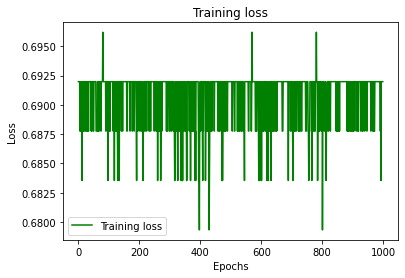

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = 0
for i in range(0,226):
  y = model.predict(benefits[i])
  z = np.sum(y,axis=0)
  z = z/50
  max=0
  for i in range(226):
    if z[i]>max:
      max = z[i]
      max_i = i
  if max_i+3==asan[i]:
    accuracy = accuracy+1

ValueError: ignored

In [ ]:
accuracy

In [ ]:
a = model.evaluate(benefits, y, verbose=0)

In [ ]:
model.load_weights('/content/weight (2).h5')

ValueError: ignored

In [ ]:
np.shape(benefits[0])

(50,)